In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [2]:
ending = "Jan19b"

#THINK - did you last unfold with nuwro or without?

##  Energy

## Closure Tests

## Blockwise Unfolding

In [3]:

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_angle_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(20):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_angle_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(400):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+20] for x in range(0, len(AC), 20)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(20):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_angle_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(20):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_angle_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(400):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+20] for x in range(0, len(cov), 20)]

print("cov")
print(chunks_cov)
print("")


Unsmeared events
[17.8043, 21.5141, 27.1571, 35.9213, 37.4373, 49.4985, 58.7126, 98.1167, 175.296, 466.052, 394.715, 462.756, 510.095, 627.667, 715.683, 975.21, 1380.63, 2005.16, 3272.7, 8400.4]

AC
[[0.39556, -0.145679, 0.0766659, 0.0197776, -0.0267741, -0.142486, 0.127834, -0.125265, 0.0261478, 0.0314652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.145679, 0.10798, -0.0855655, 0.00951963, 0.0769763, 0.050468, 6.3656e-05, 0.0802859, 0.052055, -0.0097936, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0766659, -0.0855655, 0.272849, -0.0987033, 0.00118965, 0.110789, -0.030068, 0.0909718, 0.0178488, 0.000120409, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0197776, 0.00951963, -0.0987033, 0.262647, -0.0783136, 0.00511708, -0.0145496, -0.0893613, 0.164423, 0.0121848, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.0267741, 0.0769763, 0.00118965, -0.0783136, 0.177054, 0.0250477, 0.0390595, 0.127187, 0.0505119, -0.00863715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [4]:
with open('../blockwise/stv-analysis-new/blocks.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n', '20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n']


In [5]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[  17.80425724   21.5142085    27.15710622   35.9214813    37.43729462
   49.49884782   58.71273329   98.11695012  175.29633186  466.05214338
  394.71434221  462.7545631   510.09320114  627.66663599  715.68302841
  975.21086422 1380.63002597 2005.16292138 3272.6977422  8400.40027859]


Unfolding Done with MC Data Signal: 
[17.8043, 21.5141, 27.1571, 35.9213, 37.4373, 49.4985, 58.7126, 98.1167, 175.296, 466.052, 394.715, 462.756, 510.095, 627.667, 715.683, 975.21, 1380.63, 2005.16, 3272.7, 8400.4]


Difference
[-4.27627576e-05  1.08499864e-04  6.22357699e-06  1.81297840e-04
 -5.37674676e-06  3.47820339e-04  1.33290846e-04  2.50124439e-04
  3.31863830e-04  1.43379199e-04 -6.57792083e-04 -1.43690301e-03
 -1.79885893e-03 -3.64014932e-04  2.84123496e-05  8.64223538e-04
  2.59689805e-05  2.92138254e-03 -2.25779797e-03  2.78588563e-04]

[-2.40182767e-04  5.04317248e-04  2.29169373e-05  5.04705912e-04
 -1.43620067e-05  7.02683708e-04  2.27022042e-04  2.54924800e-04
  1.89315

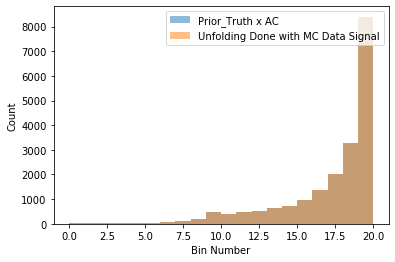

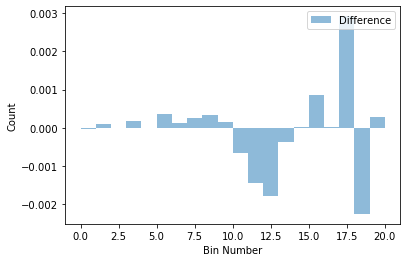

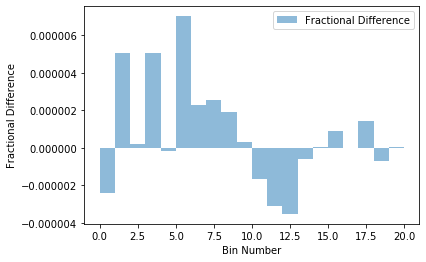

In [6]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Fractional Difference")
pyplot.show()

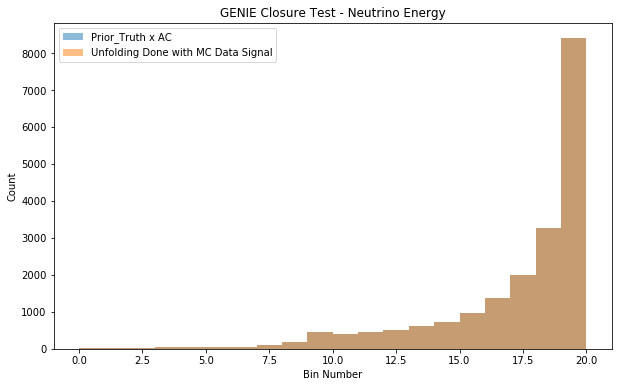

In [7]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper left')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.title("GENIE Closure Test - Neutrino Energy")
pyplot.show()

fig.savefig("GENIE_closure_test_angle_"+ending+".svg",bbox_inches='tight' )

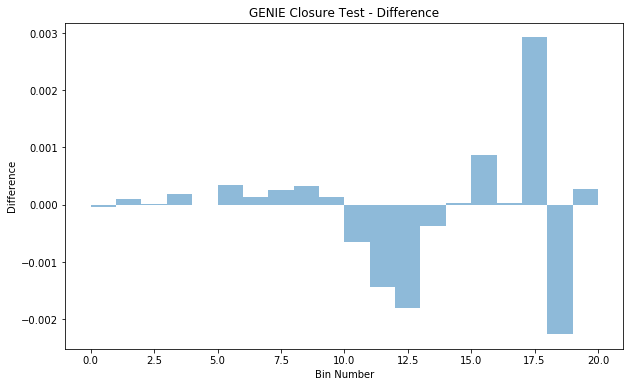

In [8]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=diff, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("GENIE Closure Test - Difference")
pyplot.show()

fig.savefig("GENIE_closure_test_diff_angle_"+ending+".svg",bbox_inches='tight' )

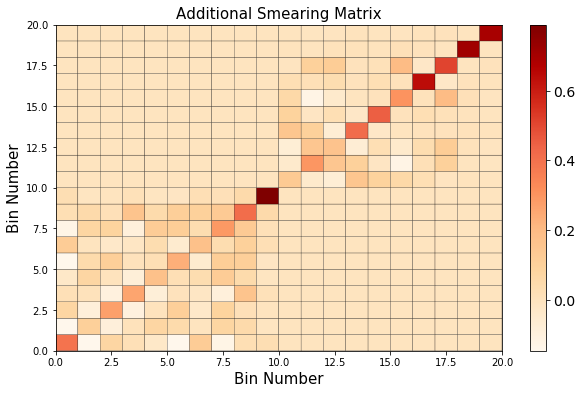

In [9]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, chunks, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title('Additional Smearing Matrix', fontsize=15)

plt.show()

fig.savefig("GENIE_closure_test_Ac_angle_"+ending+".svg",bbox_inches='tight' )

/tmp/ipykernel_33999/4171617754.py:7: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


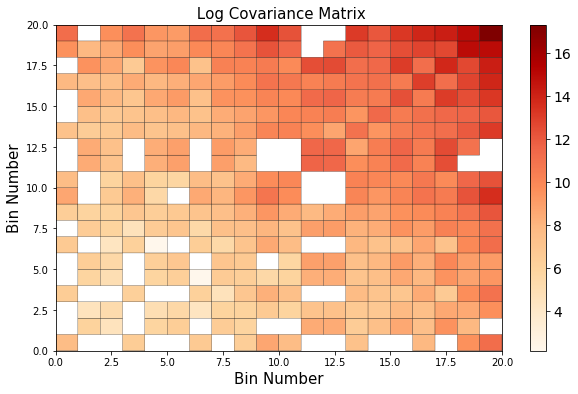

In [10]:
fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
    
plt.pcolor(bins, bins, np.log(chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

## Need to convert to xsec units

xsec = unfolded event counts / (integrated flux * number of argon targets)

In [11]:
###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

number of argon targets =  4.240685683288815e+31


In [12]:
#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

Nue integrated flux:  6699173958.965427
Numu integrated flux:  293274644711.0575


In [13]:
nue_events = np.array(events[0:10])
numu_events = np.array(events[10:20])

nue_errs = np.array(errs[0:10])
numu_errs = np.array(errs[10:20])

In [14]:
#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#uncertainty

#xsec_nue_errs = nue_errs / (int_flux * Narg )     
#xsec_numu_errs = numu_errs / (int_flux_numu * Narg )     

In [15]:
#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:10]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:10]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:10]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][10:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[10:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:10]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[10:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][10:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


/tmp/ipykernel_33999/429040335.py:9: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(bot_left), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


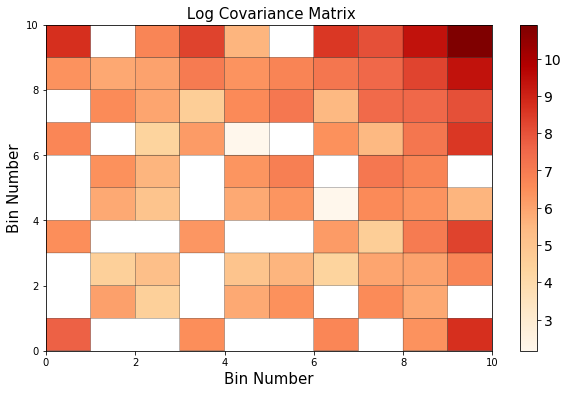

In [16]:
#BOT LEFT

fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 11, 1)
count = np.arange(0.0, 10.0, 1)
    
plt.pcolor(bins, bins, np.log(bot_left), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

/tmp/ipykernel_33999/196648468.py:9: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(bot_right), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


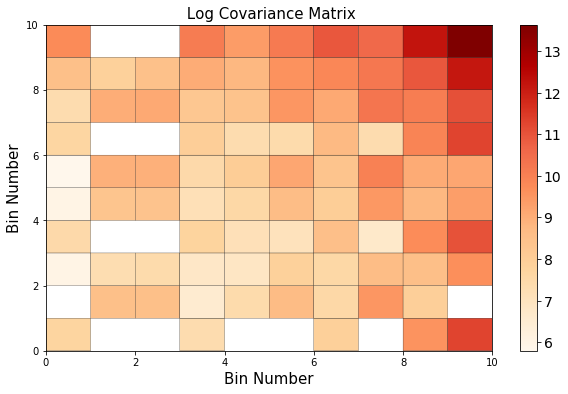

In [17]:
#BOT RIGHT

fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 11, 1)
count = np.arange(0.0, 10.0, 1)
    
plt.pcolor(bins, bins, np.log(bot_right), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

/tmp/ipykernel_33999/2783276082.py:9: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(top_left), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


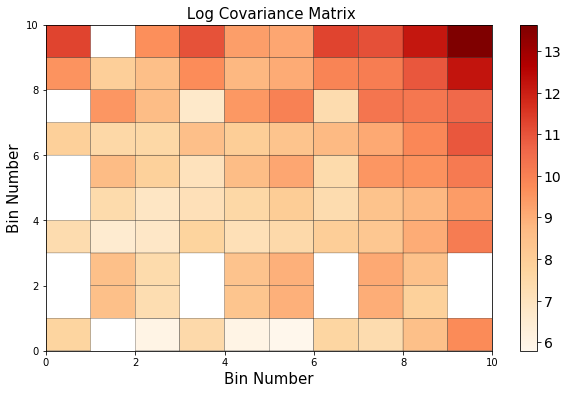

In [18]:
#TOP LEFT

fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 11, 1)
count = np.arange(0.0, 10.0, 1)
    
plt.pcolor(bins, bins, np.log(top_left), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

/tmp/ipykernel_33999/3954721658.py:9: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(top_right), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


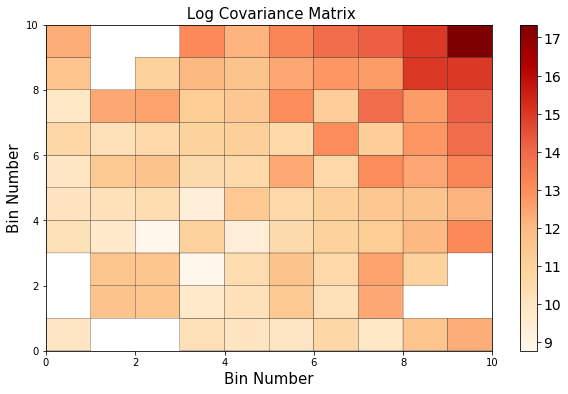

In [19]:
#TOP RIGHT

fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 11, 1)
count = np.arange(0.0, 10.0, 1)
    
plt.pcolor(bins, bins, np.log(top_right), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

In [20]:
### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

Ratio event counts:  [1.97467003 2.03528104 2.33069576 2.50539388 2.29000843 2.22201586
 1.86168958 2.1421366  2.34487163 2.42877717]

ratio_sq:  [3.89932172 4.1423689  5.43214275 6.27699847 5.24413859 4.93735448
 3.46588811 4.58874923 5.49842295 5.89895854]

nue:  [7.15633877 0.93209019 0.25964597 0.42314978 0.25361966 0.42171722
 0.18371711 0.18204743 0.13012206 0.25218128]

numu:  [0.14066373 0.5378179  0.40462049 0.15405573 0.17957929 0.25460695
 0.24619293 0.26978611 0.30802669 0.47958017]

mix:  [0.31860981 0.51775357 0.12074324 0.10522733 0.07379959 0.2011434
 0.07680978 0.15125672 0.10059872 0.21272977]

mix:  [0.31860981 0.51775357 0.12074324 0.10522733 0.07379959 0.2011434
 0.07680978 0.15125672 0.10059872 0.21272977]

[25.9686361   1.799449    2.29660117  2.30209458  1.49772481  1.35301962
  0.95759188  0.68519244  1.30285855  1.80686225]
Ratio errs:  [5.0959431  1.34143542 1.51545411 1.51726549 1.22381568 1.16319372
 0.97856623 0.82776352 1.1414283  1.34419576]


In [21]:
print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

[6.26711356e-41 7.57296315e-41 9.55929914e-41 1.26442975e-40
 1.31779295e-40 1.74234719e-40 2.06668351e-40 3.45370782e-40
 6.17041916e-40 1.64050303e-39]

[3.17375231e-41 3.72084396e-41 4.10147874e-41 5.04683022e-41
 5.75453320e-41 7.84129052e-41 1.11011176e-40 1.61227244e-40
 2.63145286e-40 6.75444026e-40]

[1.67653649e-40 7.31130348e-41 4.87098558e-41 8.22511097e-41
 6.63649299e-41 1.13147605e-40 8.85826720e-41 1.47359408e-40
 2.22582043e-40 8.23822136e-40]

[1.19032101e-41 2.72872068e-41 2.60894185e-41 1.98087754e-41
 2.43858684e-41 3.95660475e-41 5.50813399e-41 8.37429436e-41
 1.46046035e-40 4.67756656e-40]


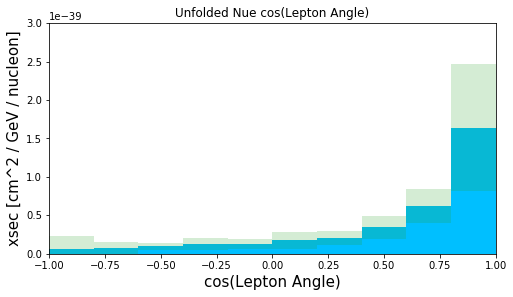

In [22]:
import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 3E-39)
nue_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nue_fig.savefig("unfolded_MC_nue_angle_"+ending+".svg",bbox_inches='tight' )

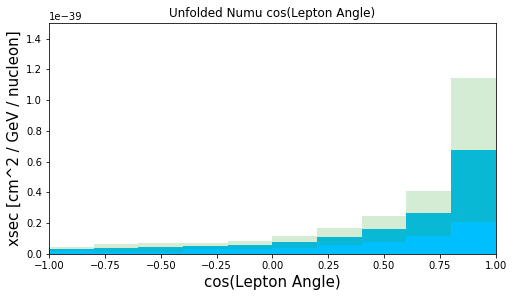

In [23]:
import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 1.5E-39)
numu_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Numu cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

numu_fig.savefig("unfolded_MC_numu_angle_"+ending+".svg",bbox_inches='tight' )

[1.97467003 2.03528104 2.33069576 2.50539388 2.29000843 2.22201586
 1.86168958 2.1421366  2.34487163 2.42877717]
[1.97467003 2.03528104 2.33069576 2.50539388 2.29000843 2.22201586
 1.86168958 2.1421366  2.34487163 2.42877717]


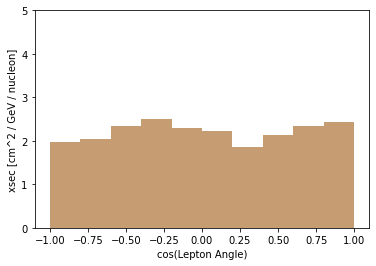

In [24]:

import random
import numpy
from matplotlib import pyplot

bins = np.arange(-1.0, 1.2, 0.2)
count = np.arange(-0.95, 1.05, 0.2)
#print(count)

plt.ylim(0, 5)
plt.xlabel("cos(Lepton Angle)")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()


[1.97467003 2.03528104 2.33069576 2.50539388 2.29000843 2.22201586
 1.86168958 2.1421366  2.34487163 2.42877717]


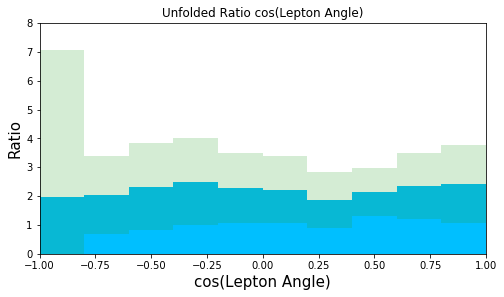

In [25]:
import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)
#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

plt.ylim(0, 8)
ratio_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

ratio_fig.savefig("unfolded_MC_ratio_angle_"+ending+".svg",bbox_inches='tight' )

In [26]:
nue_frac_err = xsec_nue_errs/xsec_nue_events
numu_frac_err = xsec_numu_errs/xsec_numu_events
ratio_frac_err = xsec_ratio_errs/xsec_ratio_events

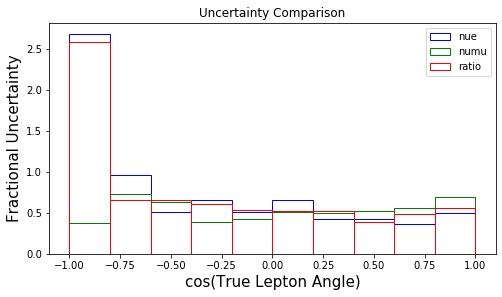

In [27]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]


sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()